In [11]:
import os
from termcolor import colored

import h5py 
from IPython.display import HTML
import imageio
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2 

In [2]:
dataset_path = "/home/ns1254/data_franka/drawer/60_drawer_bellpepper.hdf5" 

In [9]:
base_file_name = os.path.basename(dataset_path).split('.')[0]  
base_file_name

'60_drawer_bellpepper'

In [3]:
f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

lengths=[]
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  60
Max length:  999
Min length:  162
Mean length:  401.3833333333333


In [4]:
demo_name="demo_0"
demo=f['data'][demo_name] 
demo.keys()

<KeysViewHDF5 ['actions', 'obs']>

In [7]:
images=demo['obs']['agentview_rgb']
images_wrist=demo['obs']['eye_in_hand_rgb']
images=np.concatenate([images, images_wrist], axis=1)
images.shape

(179, 480, 320, 3)

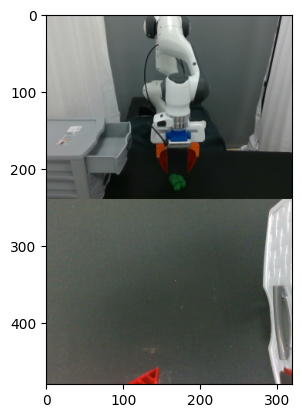

In [8]:
img=images[0]
plt.imshow(img[:,:,::-1] )

In [15]:
dirname=base_file_name 
savepath = os.path.join("imgs", dirname)
os.makedirs(savepath, exist_ok=True)

In [ ]:
for i, demo_name in enumerate(demos):
    
    demo=f['data'][demo_name]
    images=demo['obs']['agentview_rgb']
    images_wrist=demo['obs']['eye_in_hand_rgb']
    images=np.concatenate([images, images_wrist], axis=1)

    save_dir = os.path.join(savepath, demo_name)

    print(f"processing {demo_name} {i+1}/{len(demos)} {save_dir}")

    os.makedirs(save_dir, exist_ok=True)
    img=images[0]
    for i, img in enumerate(images):
        save_fn = os.path.join(save_dir, f"{i}.png")
        cv2.imwrite(save_fn, img)


processing demo_0 1/60 imgs/60_drawer_bellpepper/demo_0
processing demo_1 2/60 imgs/60_drawer_bellpepper/demo_1
processing demo_10 3/60 imgs/60_drawer_bellpepper/demo_10
processing demo_11 4/60 imgs/60_drawer_bellpepper/demo_11
processing demo_12 5/60 imgs/60_drawer_bellpepper/demo_12
processing demo_13 6/60 imgs/60_drawer_bellpepper/demo_13
processing demo_14 7/60 imgs/60_drawer_bellpepper/demo_14
processing demo_15 8/60 imgs/60_drawer_bellpepper/demo_15
processing demo_16 9/60 imgs/60_drawer_bellpepper/demo_16
processing demo_17 10/60 imgs/60_drawer_bellpepper/demo_17
processing demo_18 11/60 imgs/60_drawer_bellpepper/demo_18
processing demo_19 12/60 imgs/60_drawer_bellpepper/demo_19
processing demo_2 13/60 imgs/60_drawer_bellpepper/demo_2
processing demo_20 14/60 imgs/60_drawer_bellpepper/demo_20
processing demo_21 15/60 imgs/60_drawer_bellpepper/demo_21
processing demo_22 16/60 imgs/60_drawer_bellpepper/demo_22
processing demo_23 17/60 imgs/60_drawer_bellpepper/demo_23
processing d

In [ ]:


 


    video_writer = imageio.get_writer(f"{savepath}/{demo_name}.mp4", fps=20)
    for image in images:

        video_writer.append_data(image[:,:,::-1]) #[::-1]
    video_writer.close()

f.close()